In [ ]:
import numpy as np
X1 = np.array([
    [1,2,3,4,5],
    [2,3,3,5,5]
])
X2 = np.array([
    [ 1,2,3,3,5,6],
    [ 0,1,1,2,3,5]
])

X = np.hstack((X1, X2))
labels = np.hstack((np.zeros(5), np.ones(6)))

print(X1)
print(X2)
print(X)



# Calculate the mean vectors per class
mean_X1 = np.mean(X1,axis=1).reshape(2,1)
mean_X2 = np.mean(X2,axis=1).reshape(2,1)

print("Mean X1 \n")
print(mean_X1)
print("Mean X2 \n")
print(mean_X2)

scatter_X1 = np.dot((X1-mean_X1),(X1-mean_X1).T)
scatter_X2 = np.dot((X2-mean_X2),(X2-mean_X2).T)

print("Scatter X1\n")
print(scatter_X1)

print("Scatter X2\n")
print(scatter_X2)



X1_M=np.mean(X1, axis=1)
X2_M=np.mean(X2, axis=1)
print("\n \n Sw \n 2x 2 square mattrix")
SW = scatter_X1+scatter_X2
print(SW)

X_mean = np.mean(X, axis=1)
SB = (
    1 * np.outer(X1_M - X_mean, X1_M - X_mean) +
    1 * np.outer(X2_M - X_mean, X2_M - X_mean)
)



[[1 2 3 4 5]
 [2 3 3 5 5]]
[[1 2 3 3 5 6]
 [0 1 1 2 3 5]]
[[1 2 3 4 5 1 2 3 3 5 6]
 [2 3 3 5 5 0 1 1 2 3 5]]
Mean X1 

[[3. ]
 [3.6]]
Mean X2 

[[3.33333333]
 [2.        ]]
Scatter X1

[[10.   8. ]
 [ 8.   7.2]]
Scatter X2

[[17.33333333 16.        ]
 [16.         16.        ]]

 
 Sw 
 2x 2 square mattrix
[[27.33333333 24.        ]
 [24.         23.2       ]]


In [ ]:
print("SB : between class scatter matrix : Square, symmetric")
SB


SB : between class scatter matrix : Square, symmetric


array([[ 0.05601469, -0.26887052],
       [-0.26887052,  1.29057851]])

[ 0.66555693 -0.74634708]


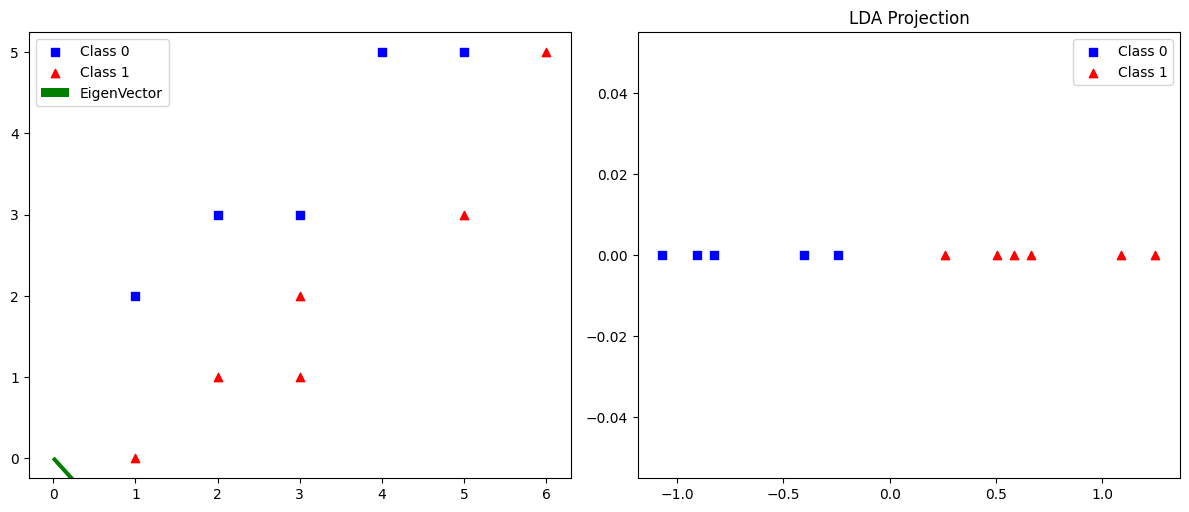

In [ ]:

eigenvalues, eigenvectors = np.linalg.eig(
    np.linalg.inv(SW).dot(SB))

# Sort the eigenvectors by decreasing eigenvalues
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Choose the top k eigenvectors to form the transformation matrix
k = 1
w_matrix = np.vstack([eigen_pairs[i][1] for i in range(k)])

# Project the data onto the new subspace
lda_data = X.T.dot(w_matrix.T)

eigenvector = eigen_pairs[0][1]

import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

print(eigenvector)

ax1.scatter(X1[0],X1[1],marker='s',c='blue', label='Class 0')
ax1.scatter(X2[0],X2[1],marker='^',c='red', label='Class 1')
ax1.quiver(0, 0, eigenvector[0], eigenvector[1], angles='xy', scale_units='xy', scale=0.5, color='green', label='EigenVector')

ax2.scatter(lda_data[labels == 0], np.zeros(np.sum(labels==0)),  marker='s',label='Class 0', color='blue')
ax2.scatter(lda_data[labels == 1], np.zeros(np.sum(labels==1)), marker='^',label='Class 1', color='red')
ax2.legend()
ax1.legend()

plt.tight_layout()
plt.title('LDA Projection')
plt.show()

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Creating the dataset
data = {
    'Flower Type': ['Type A', 'Type A', 'Type A', 'Type A', 'Type A',
                    'Type B', 'Type B', 'Type B', 'Type B', 'Type B'],
    'Sepal Length': [5.1, 4.9, 4.7, 5.0, 5.4, 6.5, 6.7, 6.3, 6.8, 6.4],
    'Sepal Width': [3.5, 3.0, 3.2, 3.6, 3.9, 3.0, 3.1, 2.9, 3.2, 2.7]
}

df = pd.DataFrame(data)

# Separating features and target
X = df[['Sepal Length', 'Sepal Width']]
y = df['Flower Type']

# Performing LDA
lda = LDA(n_components=1)
lda_result = lda.fit_transform(X, y)

# Creating a DataFrame for LDA results
lda_df = pd.DataFrame(lda_result, columns=['LDA C 1'])
lda_df['Flower Type'] = y


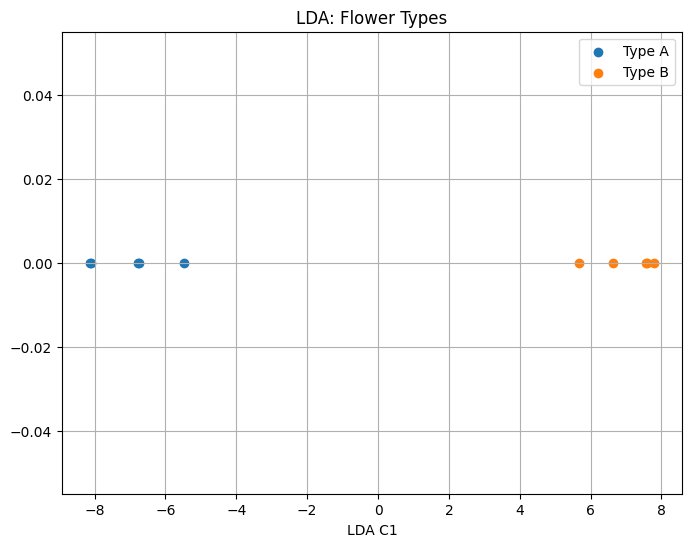

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
for flower_type in lda_df['Flower Type'].unique():
    subset = lda_df[lda_df['Flower Type'] == flower_type]
    plt.scatter(subset['LDA C 1'], [0] * len(subset), label=flower_type)

plt.title('LDA: Flower Types')
plt.xlabel('LDA C1')
plt.legend()
plt.grid(True)
plt.show()


Binary LDA accuracy (Digits 0 vs 1): 1.0


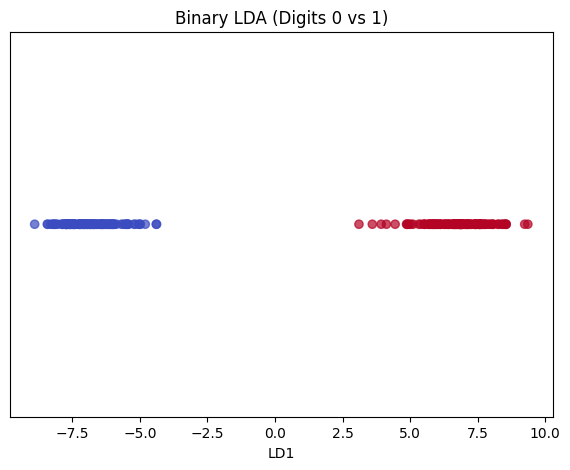

Multiclass MDA accuracy (Digits 0–9): 0.9518518518518518


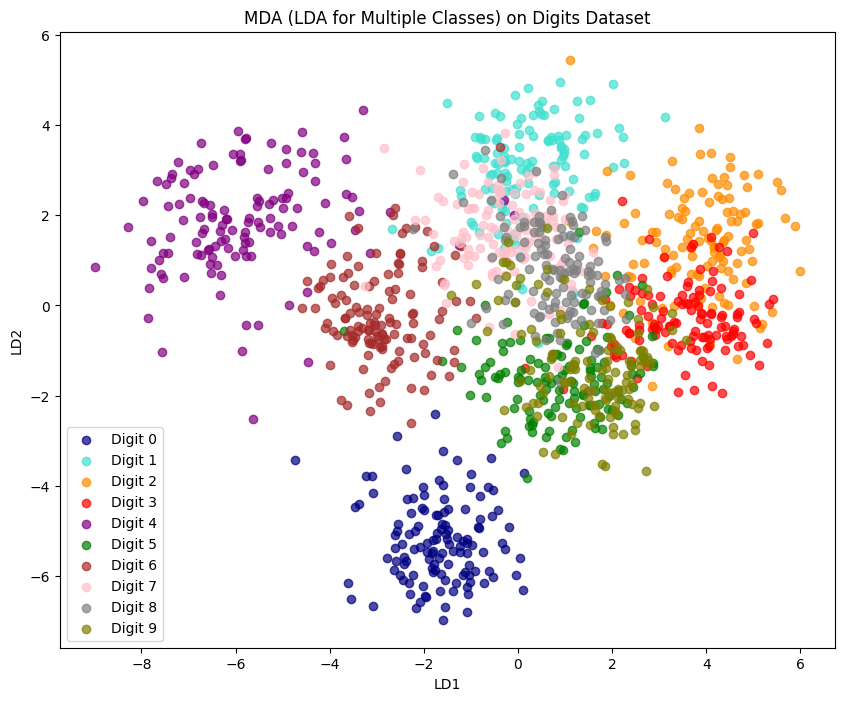

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


digits = load_digits()
X, y = digits.data, digits.target


# 1. Binary LDA (2 classes only)

mask = (y == 0) | (y == 1)   # Keep only digits 0 and 1
X_binary, y_binary = X[mask], y[mask]

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary
)

lda_binary = LDA(n_components=1)  # For 2 classes : max 1 direction
X_train_bin_lda = lda_binary.fit_transform(X_train_bin, y_train_bin)
X_test_bin_lda = lda_binary.transform(X_test_bin)

y_pred_bin = lda_binary.predict(X_test_bin)
acc_bin = accuracy_score(y_test_bin, y_pred_bin)

print("Binary LDA accuracy (Digits 0 vs 1):", acc_bin)

plt.figure(figsize=(7,5))
plt.scatter(X_train_bin_lda[:,0], [0]*len(X_train_bin_lda),
            c=y_train_bin, cmap="coolwarm", alpha=0.7)
plt.title("Binary LDA (Digits 0 vs 1)")
plt.xlabel("LD1")
plt.yticks([])
plt.show()


# 2. MDA (Multiclass, all digits 0-9)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

lda_multi = LDA(n_components=9)  # For 10 classes : max 9 directions
X_train_mda = lda_multi.fit_transform(X_train, y_train)
X_test_mda = lda_multi.transform(X_test)

y_pred_mda = lda_multi.predict(X_test)
acc_mda = accuracy_score(y_test, y_pred_mda)

print("Multiclass MDA accuracy (Digits 0–9):", acc_mda)

plt.figure(figsize=(10,8))
colors = ['navy', 'turquoise', 'darkorange', 'red', 'purple',
          'green', 'brown', 'pink', 'gray', 'olive']

for i, c in zip(range(10), colors):
    plt.scatter(X_train_mda[y_train == i, 0], X_train_mda[y_train == i, 1],
                label=f'Digit {i}', alpha=0.7, color=c)

plt.title("MDA (LDA for Multiple Classes) on Digits Dataset")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Add more samples to avoid the error
data = {
    'Politician': ['R', 'G', 'B', 'R', 'G', 'B'],
    'PSS': [7, 9, 8, 6, 9, 7],           # Public Speaking Skill
    'PK': [6, 9, 8, 5, 9, 7],            # Political Knowledge
    'PAR': [55, 85, 75, 50, 80, 70],     # Public Approval Rating
    'Integrity': [8, 9, 8, 7, 9, 8],     # Integrity
    'YoE': [18, 45, 25, 15, 40, 23],     # Years of Experience
    'SMI': [6, 9, 7, 5, 9, 6],           # Social Media Influence
    'Debate': [7, 8, 7, 6, 8, 7],        # Debate Performance
    'Party': ['Party1', 'Party2', 'Party3', 'Party1', 'Party2', 'Party3']  # Class label
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Separate features and the target variable (Party)
X = df[['PSS', 'PK', 'PAR', 'Integrity', 'YoE', 'SMI', 'Debate']]
y = df['Party']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Display the resulting components
print(X_lda)


[[-4.25642856e+00 -9.46405319e-01]
 [ 6.22479326e+00 -4.97136106e-01]
 [-3.21008968e-03  1.70216044e+00]
 [-5.18511780e+00  2.09137391e-01]
 [ 4.16154437e+00 -5.57112836e-02]
 [-9.41581173e-01 -4.12045123e-01]]


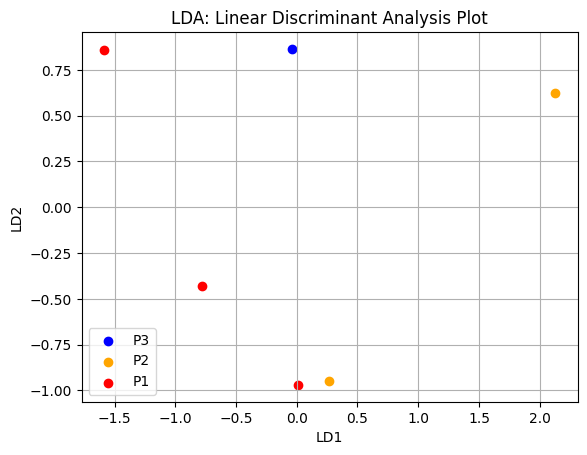

In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Dataset

data = {
    'Politician': ['R', 'G', 'B','A','L','N'],
    'PSS': [7, 9, 8,8,8,9],           # Public Speaking Skill
    'PK': [6, 9, 8,9,9,8],            # Political Knowledge
    'PAR': [55, 85, 75,80,60,70],        # Public Approval Rating
    'Integrity': [8, 9, 8,5,4,5],     # Integrity
    'YoE': [18, 45, 25,8,45,40],        # Years of Experience
    'SMI': [6, 9, 7,9,7,8],           # Social Media Influence
    'Debate': [7, 8, 7,8,8,8],        # Debate Performance
    'Party': ['P1', 'P2', 'P3','P1','P1','P2']  # Example class label
}

df = pd.DataFrame(data)

# Separating features and target
X = df[['PSS', 'PK', 'PAR', 'Integrity', 'YoE', 'SMI', 'Debate']]
y = df['Party']


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Performing LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

# Plotting the results
colors={'P1':'red', 'P2':'orange','P3':'blue'}

for party in set(y):
    plt.scatter(X_lda[y == party, 0], X_lda[y == party, 1], label=party, color=colors[party])

# Add labels and a legend
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA: Linear Discriminant Analysis Plot')
plt.legend(loc='best')

plt.legend()
plt.grid(True)
plt.show()


Lets play with the wine data set. It is most commomly used in tutorials

13 different features,

3 different classes,

Number of data samples are 178
One for sample and one for testing

3 class so we can go 2

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plot


In [ ]:
wine=load_wine() # store whole data
print(wine)


{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [ ]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
X= np.array(wine.data)
y=np.array(wine.target)
print(X)
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


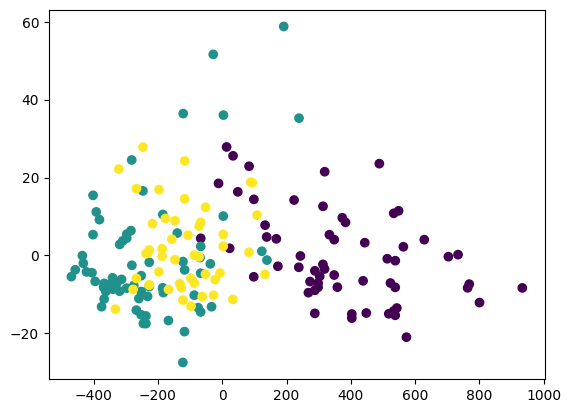

In [ ]:
# ApplyingPCA
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
result=pca.fit(X)
Z= result.transform(X)
plot.scatter(Z[:,0],Z[:,1],c=y)

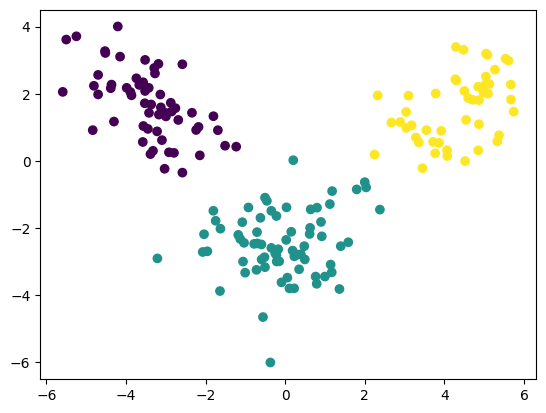

In [ ]:
#Lets apply LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis() # by default take 2
X_lda = lda.fit_transform(X,y)
plot.scatter(X_lda[:,0], X_lda[:,1],c=y)


As one can see, data linear classify

13 features, reduced data into two features.


PCA fails to preserve linear separation but LDA works well here

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=0.3)# 70 for training and 30 for testing


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis() # by default take 2
lda.fit(xtrain,ytrain)

LinearDiscriminantAnalysis()

In [ ]:
yn=lda.predict(xtest)

In [ ]:
print(ytest)
print(yn)
print(ytest-yn)

[2 0 1 2 1 2 2 1 1 2 2 0 0 0 0 1 2 1 0 1 0 2 1 1 0 0 2 0 0 1 1 2 2 1 1 2 1
 2 0 2 2 0 0 2 1 1 1 1 1 2 0 0 0 1]
[2 0 1 2 1 2 2 1 1 2 2 0 0 0 0 1 2 1 0 1 0 2 1 1 0 0 2 0 0 1 1 2 2 1 1 2 1
 2 0 2 2 0 0 2 1 1 1 1 1 2 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
